# Case. Impact of Agent availability homogeneity

Situation:

    Agents are not homogeneous in their degree of availability

In [1]:
import abm_scheduling
from abm_scheduling import Schedule as Schedule
from abm_scheduling import Nurse as Nurse

In [39]:
import time
from datetime import datetime

import abm_scheduling.Log
from abm_scheduling.Log import Log as Log

import matplotlib.pylab as plt
%matplotlib inline

import numpy.random as rnd

log = Log()

## Same degree of availability but fixed shift preferences

In [4]:
#%% Initializations
p_to_accept_negative_change = .001
num_nurses_needed = 5

# create schedule and model
schedule = Schedule(num_nurses_needed=num_nurses_needed, is_random=False)
model = abm_scheduling.NSP_AB_Model()
schedule.print_schedule()


Week's Schedule 
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 2 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 3 | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
+---------+----------+----------+----------+----------+----------+----------+----------+


In [43]:
#type 1 only first shift 
matrix_nurse_availability_type1 = ['x','','', 'x','','',  'x','','', 'x','','', 'x','','', 'x','','', 'x','','']
#type 2 only third shift 
matrix_nurse_availability_type2 = ['','','x', '','','x',  '','','x', '','','x', '','','x', '','','x', '','','x']
#type 3 1s+2s 
matrix_nurse_availability_type3 = ['x','x','', 'x','x','',  'x','x','', 'x','x','', 'x','x','', 'x','x','', '','','']
#type 4 2s+3s 
matrix_nurse_availability_type4 = ['','x','x', '','x','x',  '','x','x', '','x','x', '','x','x', '','x','x', '','x','x']
#type 5 work only weekends
matrix_nurse_availability_type5 = ['','','', '','','', '','','', '','','', '','','x', 'x','x','x', 'x','x','x']

dict_av_type = {
    1: matrix_nurse_availability_type1,
    2: matrix_nurse_availability_type2,
    3: matrix_nurse_availability_type3,
    4: matrix_nurse_availability_type4,
    5: matrix_nurse_availability_type5,
}


In [44]:
nurses = []
num_nurses_D_UF = 0
run_results_SC_over_NN_default_UF = []

number_of_runs_with_shift_coverage_1 = 0
min_number_of_runs_with_shift_coverage_1 = 3

start_time = datetime.today()
print(str(start_time.strftime("%d-%m-%y %H %M %S")))

while number_of_runs_with_shift_coverage_1 < min_number_of_runs_with_shift_coverage_1:
    # create nurse with random type
    p_av = rnd.randint(5)+1
    matrix_nurse_availability_type = dict_av_type[p_av]

    nurse = Nurse(id_name=num_nurses_D_UF)
    nurse.assign_shift_preferences(matrix_nurse_availability = matrix_nurse_availability_type)
    nurses.append(nurse)
    num_nurses_D_UF += 1

    results = model.run(schedule_org=schedule,
                       nurses_org=nurses,
                       p_to_accept_negative_change=p_to_accept_negative_change,
                       utility_function_parameters=None,
                       print_stats=False)
    run_results_SC_over_NN_default_UF.append(results)

    if results.shift_coverage >= 1:
        number_of_runs_with_shift_coverage_1 += 1


end_time = datetime.today()
log.print_elapsed_time(start_time,end_time)

17-06-19 18 16 11
Start:  2019-06-17 18:16:11.426916
End:  2019-06-17 18:23:52.585190
Elapsed time: 00:07:41


In [45]:
# run model with agetn satisfaction utility function
utility_function_parameters = abm_scheduling.Utility_Function_Parameters()
utility_function_parameters.utility_function = 'agent_satisfaction'
num_nurses_AS_UF = 0
run_results_SC_over_NN_AS_UF = []
nurses = []

number_of_runs_with_shift_coverage_1 = 0

start_time = datetime.today()
print(str(start_time.strftime("%d-%m-%y %H %M %S")))

while number_of_runs_with_shift_coverage_1 < min_number_of_runs_with_shift_coverage_1:
    # create nurse with random type
    p_av = rnd.randint(5)+1
    matrix_nurse_availability_type = dict_av_type[p_av]

    nurse = Nurse(id_name=num_nurses_AS_UF)
    nurse.assign_shift_preferences(matrix_nurse_availability = matrix_nurse_availability_type)
    nurses.append(nurse)
    num_nurses_AS_UF += 1
    
    results = model.run(schedule_org=schedule,
                       nurses_org=nurses,
                       p_to_accept_negative_change=p_to_accept_negative_change,
                       utility_function_parameters = utility_function_parameters,
                       print_stats=False)
    run_results_SC_over_NN_AS_UF.append(results)

    if results.shift_coverage >= 1:
        number_of_runs_with_shift_coverage_1 += 1

end_time = datetime.today()
log.print_elapsed_time(start_time,end_time)

17-06-19 18 23 52
Start:  2019-06-17 18:23:52.611935
End:  2019-06-17 18:49:52.754221
Elapsed time: 00:26:00


### Shift coverage

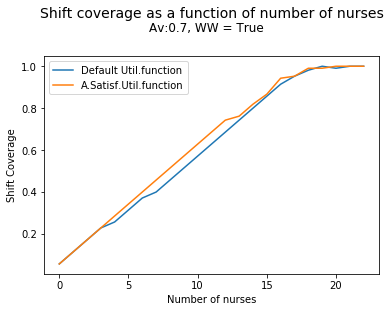

In [47]:
plt.figure()
plt.plot(range(num_nurses_D_UF), [r.shift_coverage for r in run_results_SC_over_NN_default_UF], label="Default Util.function")
plt.plot(range(num_nurses_AS_UF), [r.shift_coverage for r in run_results_SC_over_NN_AS_UF], label="A.Satisf.Util.function")
plt.title(f'Shift coverage as a function of number of nurses', y=1.15, fontsize=14)
plt.suptitle(f'Av:0.7, WW = True', y=1.0)
plt.xlabel("Number of nurses")
plt.ylabel("Shift Coverage")
plt.legend()
plt.show()

### Agent satisfaction

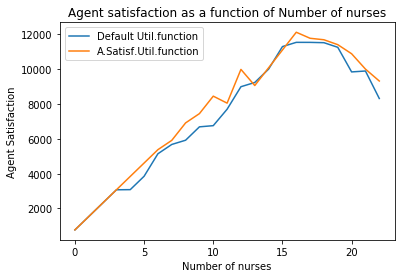

In [53]:
plt.figure()
plt.plot(range(len(run_results_SC_over_NN_default_UF)), [r.total_agent_satisfaction for r in run_results_SC_over_NN_default_UF], label="Default Util.function")
plt.plot(range(len(run_results_SC_over_NN_AS_UF)), [r.total_agent_satisfaction for r in run_results_SC_over_NN_AS_UF], label="A.Satisf.Util.function")
plt.title(f'Agent satisfaction as a function of Number of nurses')
plt.xlabel("Number of nurses")
plt.ylabel("Agent Satisfaction")
plt.legend()
plt.show()

### Agent productivity

In [49]:
# get aggregated productivity results
def get_aggr_prod_results(run_results, detail_productivity_over_nr_nurses,avg_productivity_over_nr_nurses,
                          nr_nurses_underbooked, nr_nurses_overbooked):
    for r in run_results:
        data = []
        underbooked = 0
        overbooked = 0
        for nurse in r.nurses:
            assigned_shifts = len(nurse.shifts)
            data.append(assigned_shifts/ nurse.minimum_shifts)
            underbooked += 1*(assigned_shifts<nurse.minimum_shifts)
            overbooked += 1*(assigned_shifts>nurse.maximum_shifts)
        detail_productivity_over_nr_nurses.append(data)
        avg_productivity_over_nr_nurses.append(sum(data)/len(data))
        nr_nurses_underbooked.append(underbooked)
        nr_nurses_overbooked.append(overbooked)
        

# for default utility function
detail_productivity_over_nr_nurses_DUF = []
avg_productivity_over_nr_nurses_DUF = []
nr_nurses_underbooked_DUF = []
nr_nurses_overbooked_DUF = []

get_aggr_prod_results(run_results=run_results_SC_over_NN_default_UF, 
                      detail_productivity_over_nr_nurses=detail_productivity_over_nr_nurses_DUF,
                      avg_productivity_over_nr_nurses=avg_productivity_over_nr_nurses_DUF,
                     nr_nurses_underbooked=nr_nurses_underbooked_DUF,
                     nr_nurses_overbooked=nr_nurses_overbooked_DUF)

# for agent satisfaction utility function
detail_productivity_over_nr_nurses_ASUF = []
avg_productivity_over_nr_nurses_ASUF = []
nr_nurses_underbooked_ASUF = []
nr_nurses_overbooked_ASUF = []

get_aggr_prod_results(run_results=run_results_SC_over_NN_AS_UF, 
                      detail_productivity_over_nr_nurses=detail_productivity_over_nr_nurses_ASUF,
                      avg_productivity_over_nr_nurses=avg_productivity_over_nr_nurses_ASUF,
                      nr_nurses_underbooked=nr_nurses_underbooked_ASUF,
                      nr_nurses_overbooked=nr_nurses_overbooked_ASUF)  

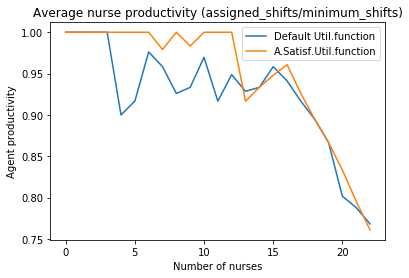

nr_nurses_underbooked_DUF [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 4, 5, 6, 11, 13, 16]
nr_nurses_overbooked [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [54]:
plt.figure()
plt.plot(range(len(run_results_SC_over_NN_default_UF)), avg_productivity_over_nr_nurses_DUF, label="Default Util.function")
plt.plot(range(len(avg_productivity_over_nr_nurses_ASUF)), avg_productivity_over_nr_nurses_ASUF, label="A.Satisf.Util.function")
plt.title(f'Average nurse productivity (assigned_shifts/minimum_shifts)')
plt.xlabel("Number of nurses")
plt.ylabel("Agent productivity")
plt.legend()
plt.show()

print("nr_nurses_underbooked_DUF", nr_nurses_underbooked_DUF)
print("nr_nurses_overbooked", nr_nurses_overbooked_DUF)

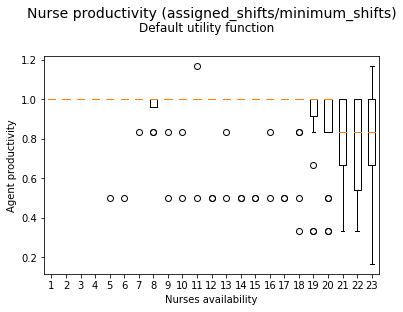

nr_nurses_underbooked_DUF [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 4, 5, 6, 11, 13, 16]
nr_nurses_overbooked [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [55]:
plt.figure()
w = plt.boxplot(detail_productivity_over_nr_nurses_DUF)
plt.title(f'Nurse productivity (assigned_shifts/minimum_shifts)', y=1.15, fontsize=14)
plt.suptitle(f'Default utility function', y=1.0)
plt.xlabel("Nurses availability")
plt.ylabel("Agent productivity")
plt.show()

print("nr_nurses_underbooked_DUF", nr_nurses_underbooked_DUF)
print("nr_nurses_overbooked", nr_nurses_overbooked_DUF)

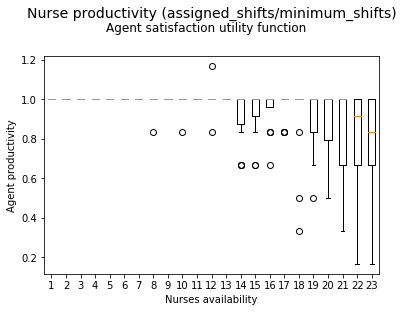

In [56]:
plt.figure()
w = plt.boxplot(detail_productivity_over_nr_nurses_ASUF)
plt.title(f'Nurse productivity (assigned_shifts/minimum_shifts)', y=1.15, fontsize=14)
plt.suptitle(f'Agent satisfaction utility function', y=1.0)
plt.xlabel("Nurses availability")
plt.ylabel("Agent productivity")
plt.show()